In [5]:
import pandas as pd
import matplotlib.pyplot as plt


ACY_05M = pd.read_csv('../data/processed/ACY_05M.csv')
ACY_05M['Month'] = pd.to_datetime(ACY_05M['Month'])
ACY_05M = ACY_05M.sort_values(by='Month')

ACY_05M.info()
ACY_05M.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   id                                                        66 non-null     int64         
 1   Month                                                     66 non-null     datetime64[ns]
 2   Initial Decisions                                         66 non-null     int64         
 3   Substantive Interviews                                    66 non-null     int64         
 4   Total Principal Stages Completed                          66 non-null     int64         
 5   Asylum Caseworking Staff                                  66 non-null     float64       
 6   Productivity (Principal Stages Per Caseworker Per Month)  66 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memo

,id,Month,Initial Decisions,Substantive Interviews,Total Principal Stages Completed,Asylum Caseworking Staff,Productivity (Principal Stages Per Caseworker Per Month)
0,1,2020-01-01,2332,2304,4636,635.0,7.0
1,2,2020-02-01,2246,2231,4477,616.0,7.0
2,3,2020-03-01,1970,1588,3558,607.0,6.0
3,4,2020-04-01,380,1,381,608.0,1.0
4,5,2020-05-01,1052,1,1053,604.0,2.0


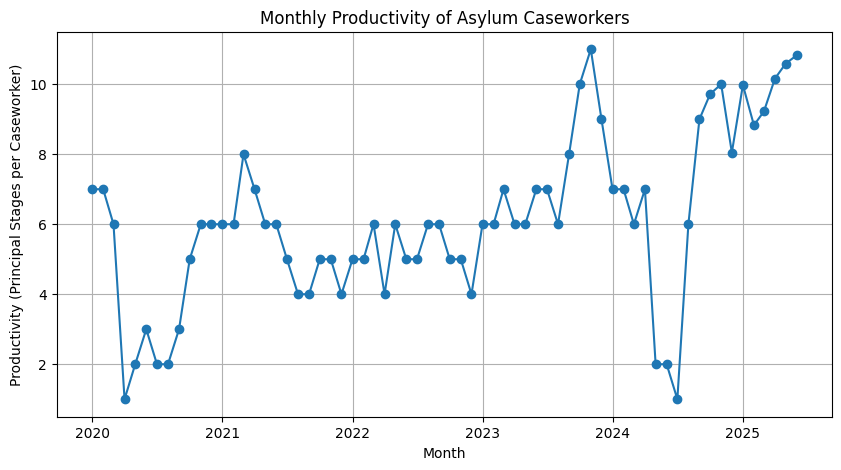

In [ ]:
ACY_05M = ACY_05M.rename(columns={'Productivity (Principal Stages Per Caseworker Per Month)': 'Productivity'})

plt.figure(figsize=(10,5))
plt.plot(ACY_05M['Month'], ACY_05M['Productivity'], marker='o')
plt.title('Monthly Productivity of Asylum Caseworkers')
plt.xlabel('Month')
plt.ylabel('Productivity (Principal Stages per Caseworker)')
plt.grid(True)
plt.show()


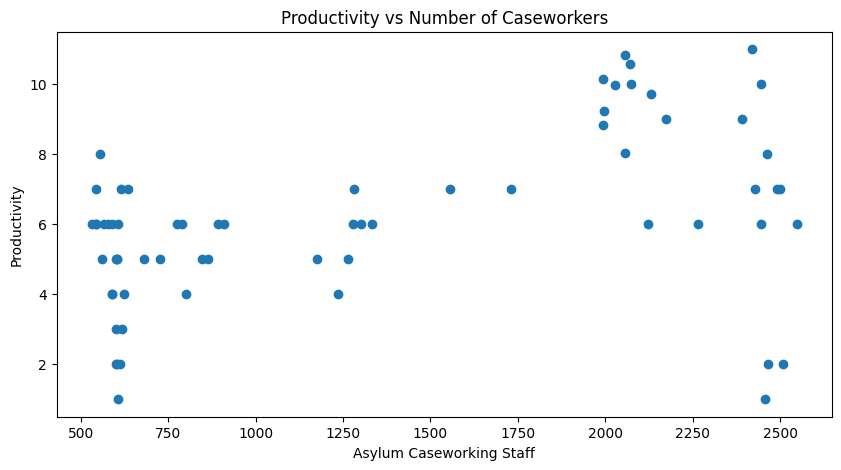

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(ACY_05M['Asylum Caseworking Staff'], ACY_05M['Productivity'])
plt.title('Productivity vs Number of Caseworkers')
plt.xlabel('Asylum Caseworking Staff')
plt.ylabel('Productivity')
plt.show()

In [10]:
correlation = ACY_05M.corr(numeric_only=True)
print(correlation['Productivity'])


id                                  0.556233
Initial Decisions                   0.754364
Substantive Interviews              0.803615
Total Principal Stages Completed    0.826359
Asylum Caseworking Staff            0.452572
Productivity                        1.000000
Name: Productivity, dtype: float64


<Axes: >

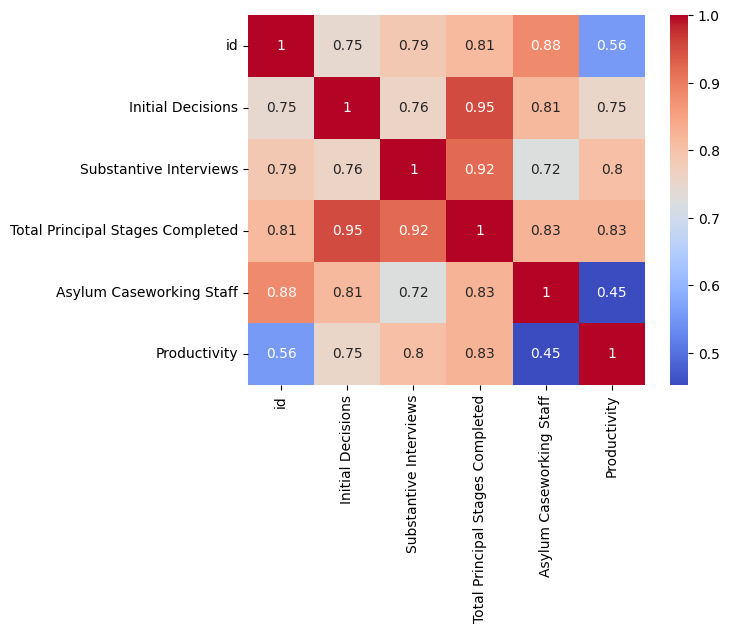

In [11]:
import seaborn as sns
sns.heatmap(correlation, annot=True, cmap='coolwarm')


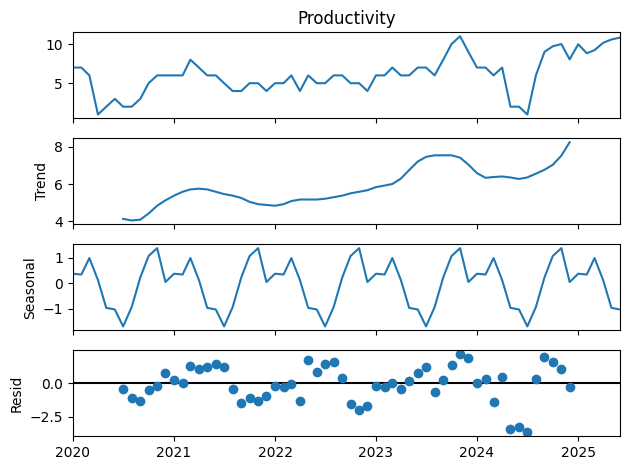

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(ACY_05M.set_index('Month')['Productivity'], model='additive', period=12)
decomp.plot()
plt.show()


In [14]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ACY_05M['Productivity'], order=(1,1,1))
fit = model.fit()
print(fit.summary())


forecast = fit.forecast(steps=12)
print(forecast)

                               SARIMAX Results                                
Dep. Variable:           Productivity   No. Observations:                   66
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -120.690
Date:                Wed, 08 Oct 2025   AIC                            247.379
Time:                        13:39:26   BIC                            253.903
Sample:                             0   HQIC                           249.953
                                 - 66                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6858      1.336     -0.513      0.608      -3.304       1.933
ma.L1          0.6375      1.430      0.446      0.656      -2.165       3.440
sigma2         2.4002      0.288      8.343      0.0

c:\Users\ilyas\dev\ukgov_data_analysis\myenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ilyas\dev\ukgov_data_analysis\myenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


13:47:06 - cmdstanpy - INFO - Chain [1] start processing
13:47:06 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\ilyas\dev\ukgov_data_analysis\myenv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


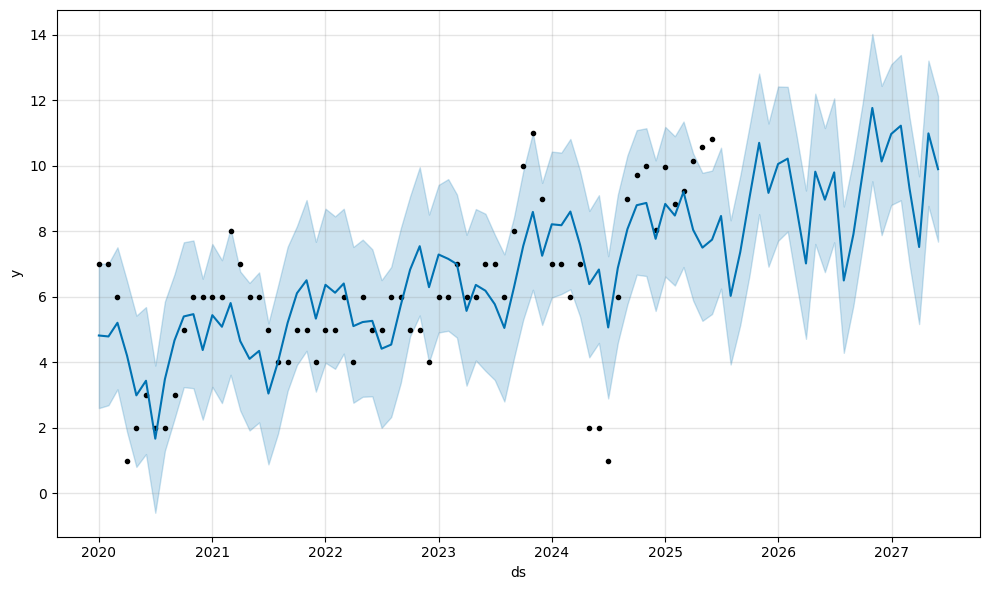

In [17]:
from prophet import Prophet

df_prophet = ACY_05M[['Month', 'Productivity']].rename(columns={'Month':'ds', 'Productivity':'y'})

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

model.plot(forecast)
plt.show()
